In [28]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,BatchNormalization, MaxPooling2D,Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]), array([500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
       500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
       500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
       500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
       500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
       500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
       500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
       500, 500, 500, 500, 500, 500, 500, 500, 500]

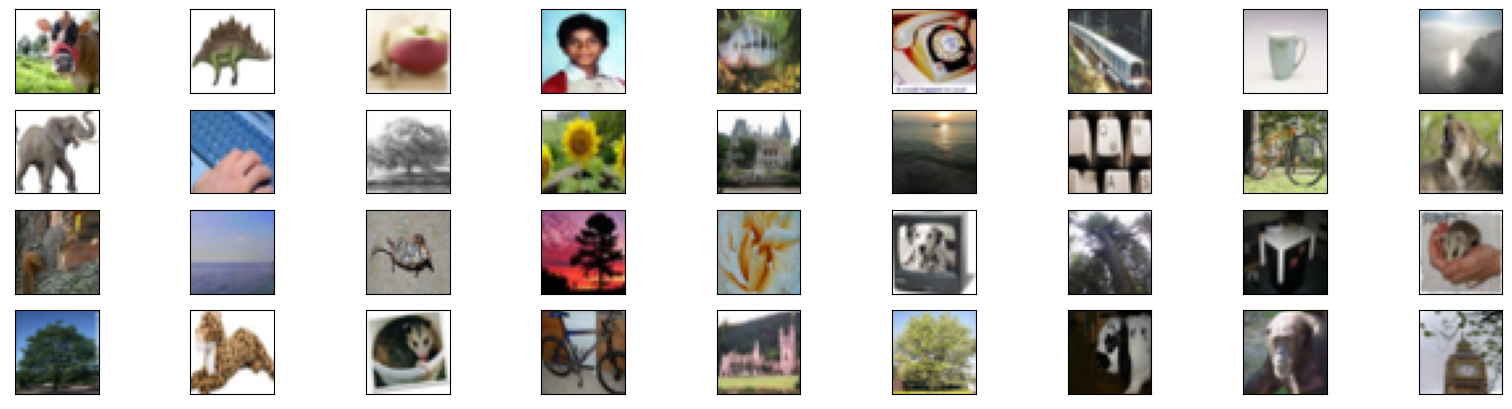

In [29]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

print(np.unique(y_train, return_counts = True)) 

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)   

figure = plt.figure(figsize=(20,5))
for i in range(36):
    img = figure.add_subplot(4, 9, i+1, xticks=[], yticks=[])
    img.imshow(x_train[i], 'gray')       

# ---------- 전처리 ---------- #
x_train = x_train.reshape(50000, 32*32*3)
x_test = x_test.reshape(10000, 32*32*3)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)  

x_test = x_test/255.0
x_train = x_train/255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [30]:
model = Sequential()
# model.add(Flatten())
model.add(Dense(units=64, input_shape=(32*32*3, ), activation='relu'))
model.add(Dense(units=64, activation='relu')) 
model.add(Dropout(0.3)) 
model.add(Dense(units=32, activation='relu')) 
model.add(Dropout(0.3)) 
model.add(Dense(units=16, activation='relu')) 
model.add(Dense(units=100, activation='softmax')) 
# model.summary()

In [31]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='acc') # one-hot encoding 하지 않아도 되는 데이터이므로 loss= sparse_categorical_crossentropy

path = 'C:/study/keras/keras_save/MCP/'
MCP = ModelCheckpoint(monitor='acc', mode='auto', save_best_only=True, filepath=path+'keras36_3_cifar10.hdf5') 
ES = EarlyStopping(monitor='acc', mode='auto', patience=4, restore_best_weights=True) 
model.fit(x_train, y_train, epochs=64, batch_size=512, validation_split=0.1, callbacks=[ES, MCP])


Epoch 1/64
88/88 [==============================] - 1s 7ms/step - loss: 4.5996 - acc: 0.0112 - val_loss: 4.5685 - val_acc: 0.0166
Epoch 2/64
88/88 [==============================] - 0s 5ms/step - loss: 4.5244 - acc: 0.0207 - val_loss: 4.4526 - val_acc: 0.0246
Epoch 3/64
88/88 [==============================] - 0s 5ms/step - loss: 4.4318 - acc: 0.0280 - val_loss: 4.3550 - val_acc: 0.0350
Epoch 4/64
88/88 [==============================] - 1s 6ms/step - loss: 4.3312 - acc: 0.0344 - val_loss: 4.2496 - val_acc: 0.0416
Epoch 5/64
88/88 [==============================] - 0s 5ms/step - loss: 4.2578 - acc: 0.0403 - val_loss: 4.1990 - val_acc: 0.0500
Epoch 6/64
88/88 [==============================] - 0s 6ms/step - loss: 4.2097 - acc: 0.0488 - val_loss: 4.1523 - val_acc: 0.0566
Epoch 7/64
88/88 [==============================] - 1s 6ms/step - loss: 4.1693 - acc: 0.0546 - val_loss: 4.1095 - val_acc: 0.0592
Epoch 8/64
88/88 [==============================] - 1s 6ms/step - loss: 4.1421 - acc: 0.05

In [32]:
metric = model.evaluate(x_test, y_test) # compile에서 metrics = acc를 지정했으므로 evaluate는 값을 배열 형태로 2개 반환함
print('loss: ', metric[0], 'acc: ', metric[1])

313/313 [==============================] - 1s 2ms/step - loss: 3.9158 - acc: 0.0900
loss:  3.9157726764678955 acc:  0.09000000357627869
